### 机器学习算法应用

#### 步骤：
- 1.选算法，对象实例化

- 2.利用fit()进行训练，参数为训练数据和标签

- 3.利用训练好的predict()预测测试集,可以获得“标签”result

- 4.利用score（）得到预测准确率score



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x1, x2):
    y = 0.9 * np.sin(x1) + 0.1 * np.cos(x2) + 0.1 * x1 + 3
    return y

def load_data():
    x1_train = np.linspace(0,50,500)
    x2_train = np.linspace(-10,10,500)
    data_train = np.array([[x1,x2,f(x1,x2)
            +(np.random.random(1)-0.5)]
          for x1,x2 in zip(x1_train,x2_train)])
    x1_test = np.linspace(0,50,100)+0.5*np.random.random(100)
    x2_test = np.linspace(-10,10,100)+0.02*np.random.random(100)
    data_test = np.array([[x1,x2,f(x1,x2)] 
            for x1,x2 in zip(x1_test,x2_test)])
    return data_train, data_test

train,test=load_data()
x_train,y_train = train[:,:2], train[:,2]
x_test ,y_test = test[:,:2],test[:,2]

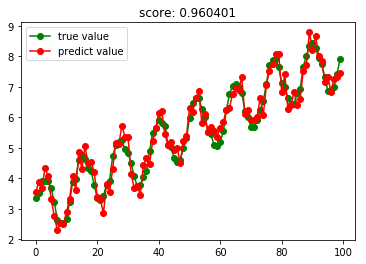

In [2]:
from sklearn.tree import DecisionTreeRegressor
clf =  DecisionTreeRegressor()
clf.fit(x_train,y_train)
result = clf.predict(x_test)
score = clf.score(x_test, y_test)
plt.figure()
plt.plot(np.arange(len(result)),y_test,
                        'go-',label="true value")
plt.plot(np.arange(len(result)),result ,
                    'ro-',label ="predict value")
plt.title('score: %f' %score)
plt.legend()
plt.show()

### 实验sklearn各种常见算法

In [3]:
def different_clf(clf):
    clf.fit(x_train,y_train)
    result = clf.predict(x_test)
    score = clf.score(x_test,y_test)
    plt.figure()
    plt.plot(np.arange(len(result)),y_test,
                        'go-',label="true value")
    plt.plot(np.arange(len(result)),result ,
                    'ro-',label ="predict value")
    plt.title('score: %f' %score)
    plt.legend()
    plt.show()

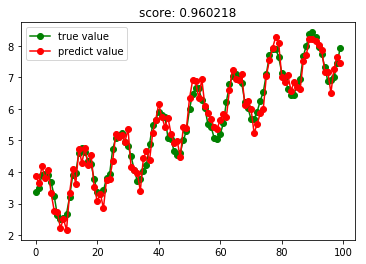

In [4]:
# 决策树算法
dtree = DecisionTreeRegressor() 
different_clf(dtree)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


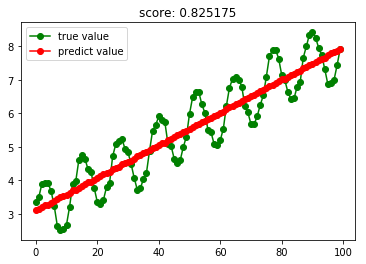

In [5]:
#线性回归算法
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
different_clf(linear_reg)

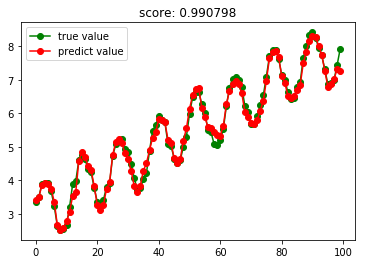

In [6]:
# 支持向量机算法

from sklearn import svm
svr = svm.SVR()
different_clf(svr)

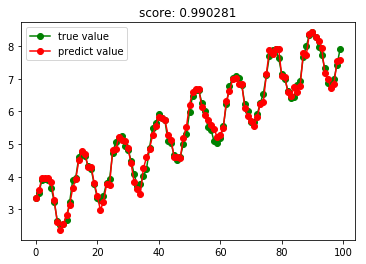

In [7]:
# k近邻算法
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
different_clf(knn)

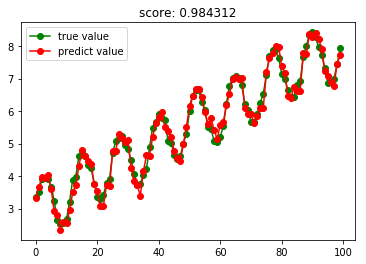

In [8]:
# 集成算法：随机森林

from   sklearn import ensemble
rf = ensemble.RandomForestRegressor(n_estimators =20)
different_clf(rf)

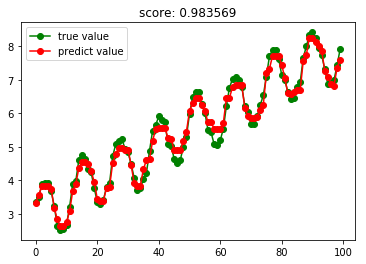

In [9]:
# 集成方法：梯度提升回归(GBRT)
from sklearn import ensemble
gbrt = ensemble.GradientBoostingRegressor(
                            n_estimators = 80)
different_clf(gbrt)

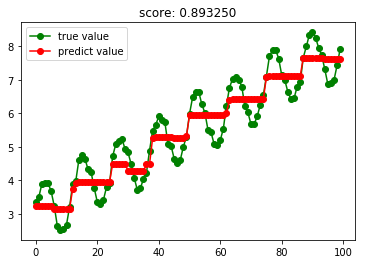

In [10]:
# 集成方法：Adaboost
from sklearn import ensemble
ada = ensemble.AdaBoostRegressor(
                        n_estimators =100)
different_clf(ada)